In [92]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.patheffects as PathEffects

In [93]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
#inserting wine colou feature
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [94]:
# #checking data heads
# wine[D].describe()
# wine[D].head()
# wine[DLC].describe()
# wine[DLC].head()

## BEFORE NORMALIZATION

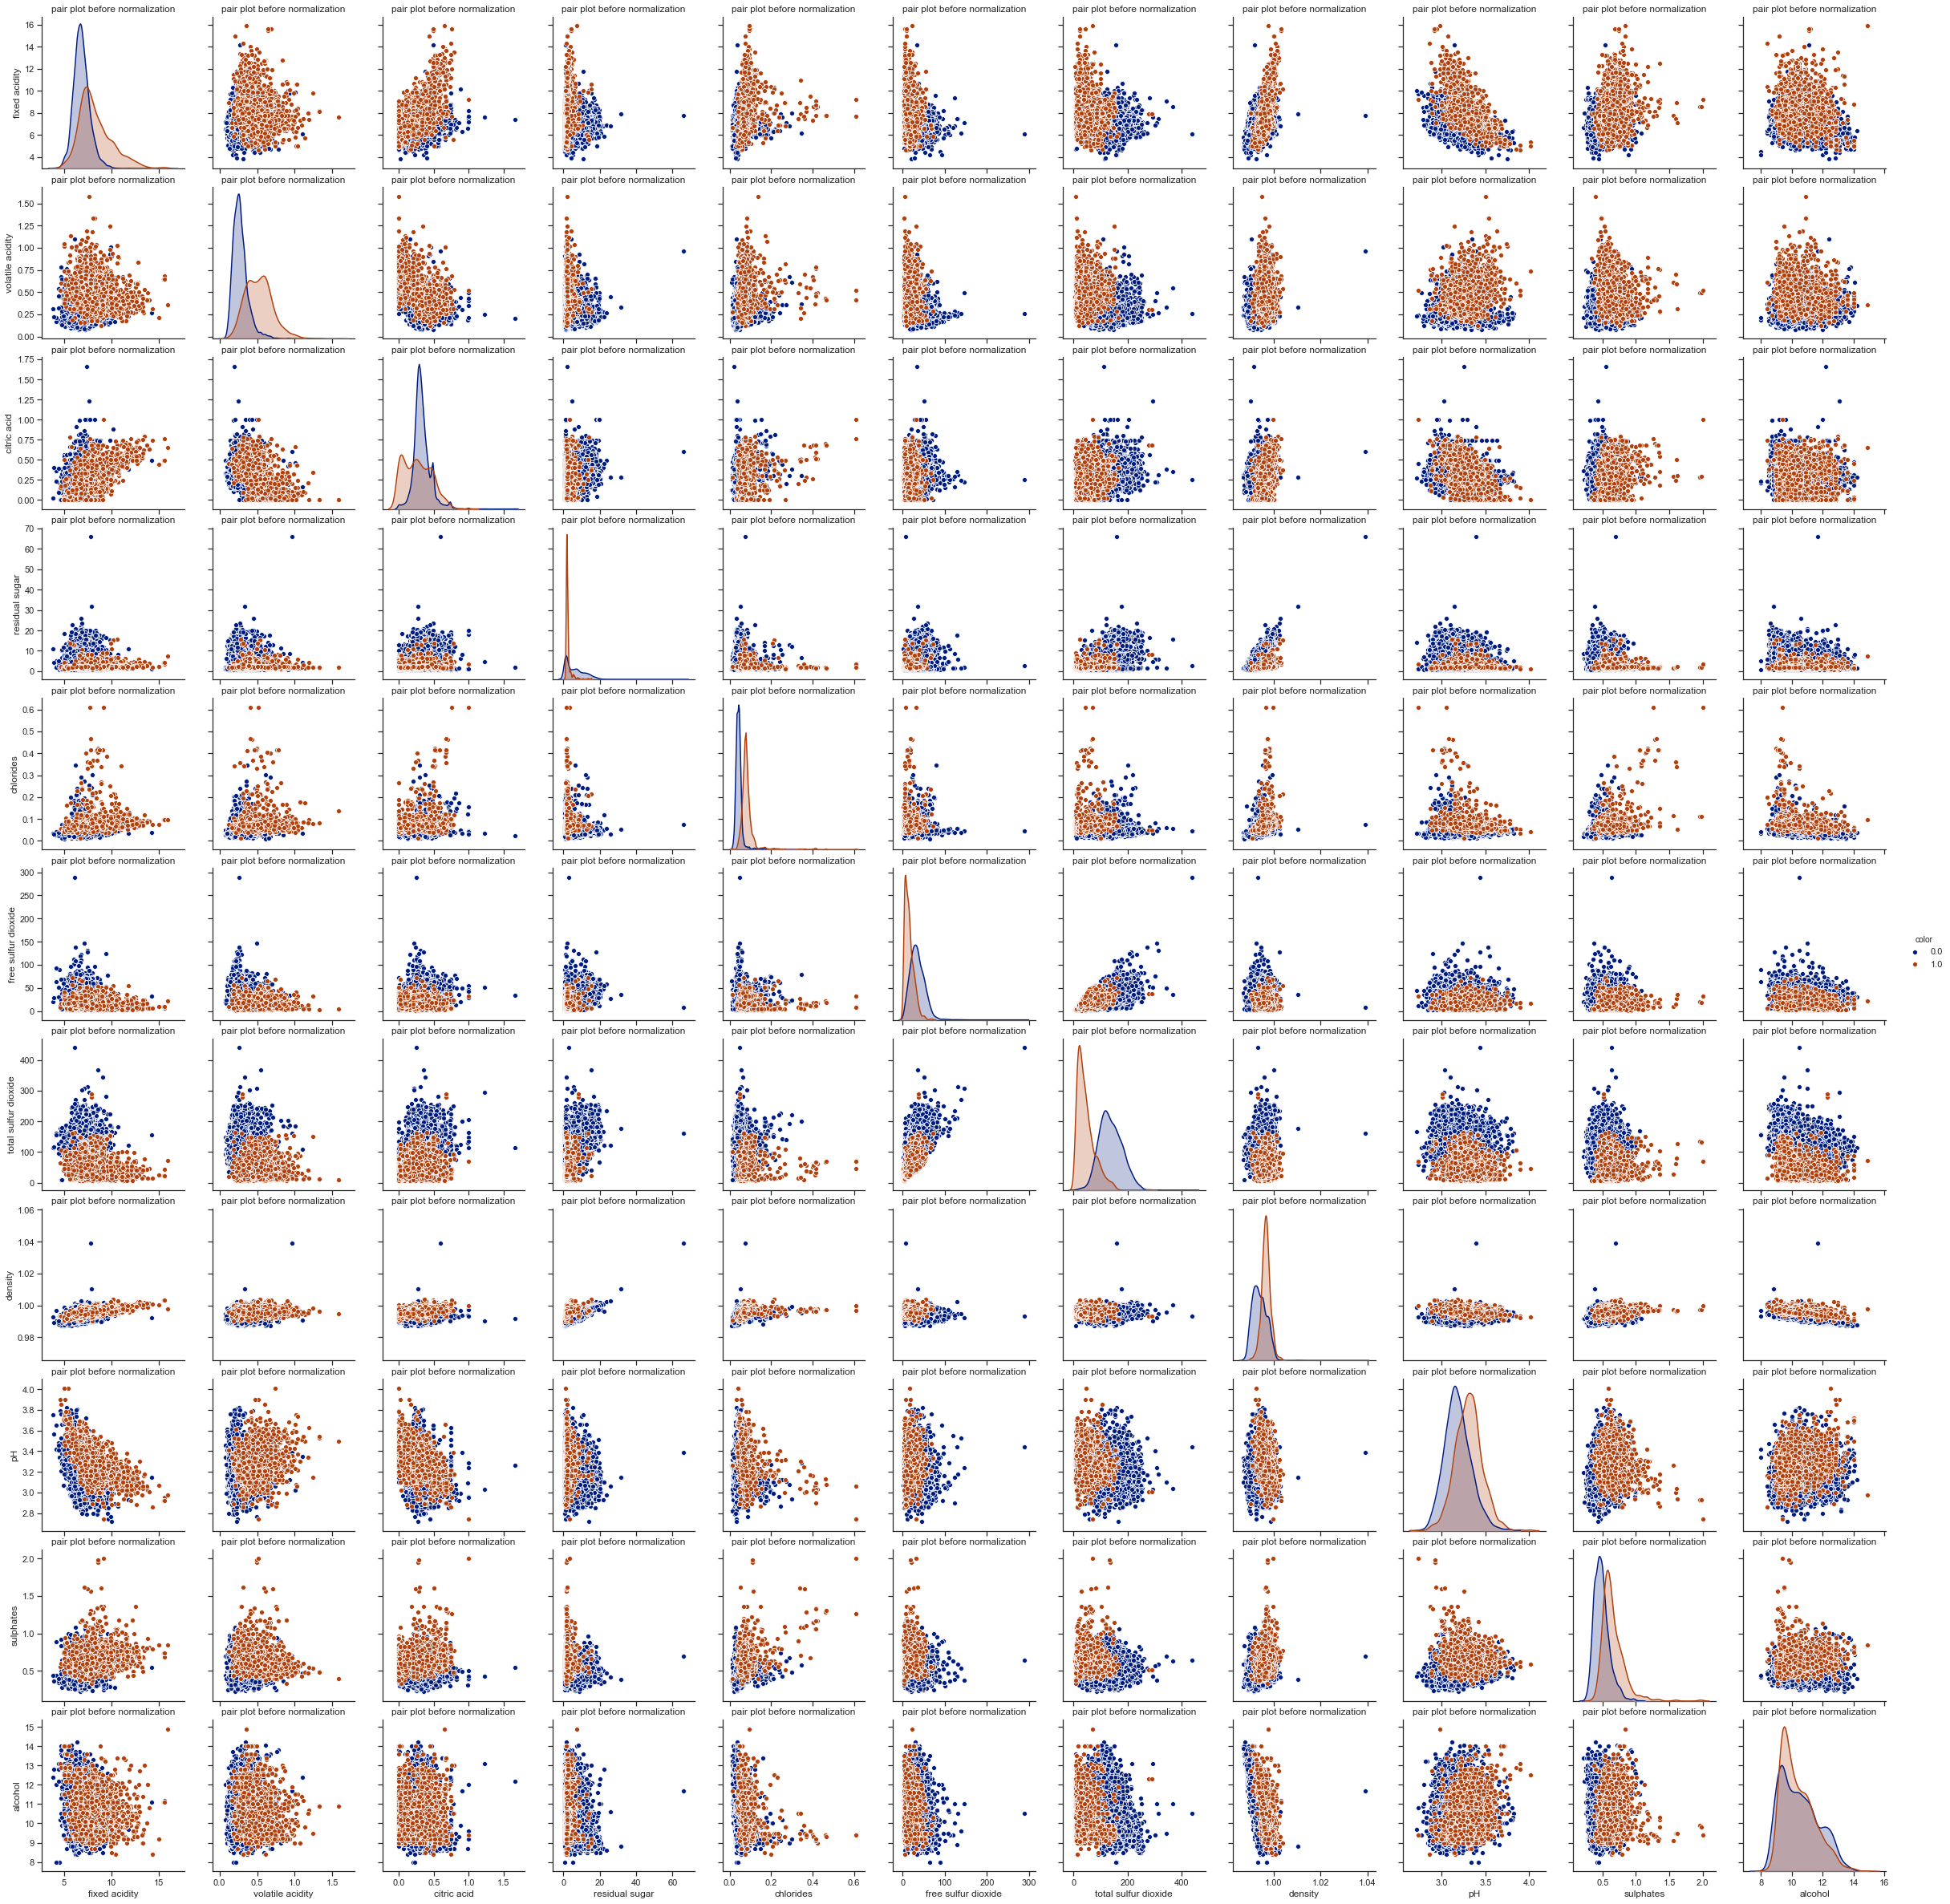

In [95]:
sns.set_palette("dark")

#print(wine_dc_one[DC].head())
sns_plot=sns.pairplot(wine[DC],hue='color',vars=D,height=3)
#sns_plot.savefig("output.png")

#plt.title("pair plots before normalization")
sns_plot.set(title ="pair plot before normalization")


###### selecting 4 best features to plot pair plots as 11 x 11 cannot be visualised properly
Using Univariate Selection Method

In [96]:
data = wine[DC]
#print(type(data))
X = data.iloc[:,0:10]  #independent columns
y = data.iloc[:,-1]    #target column i.e color of wine
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

                  Specs         Score
6  total sulfur dioxide  87946.248732
5   free sulfur dioxide  14913.554060
3        residual sugar   3287.056863
0         fixed acidity    358.497091
1      volatile acidity    221.064880
9             sulphates     64.271565
4             chlorides     37.398554
2           citric acid     15.118752
8                    pH      5.652320
7               density      0.008961


From the above results selecting features with top 4 scores;

So features considered for pair plots are : ['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity']

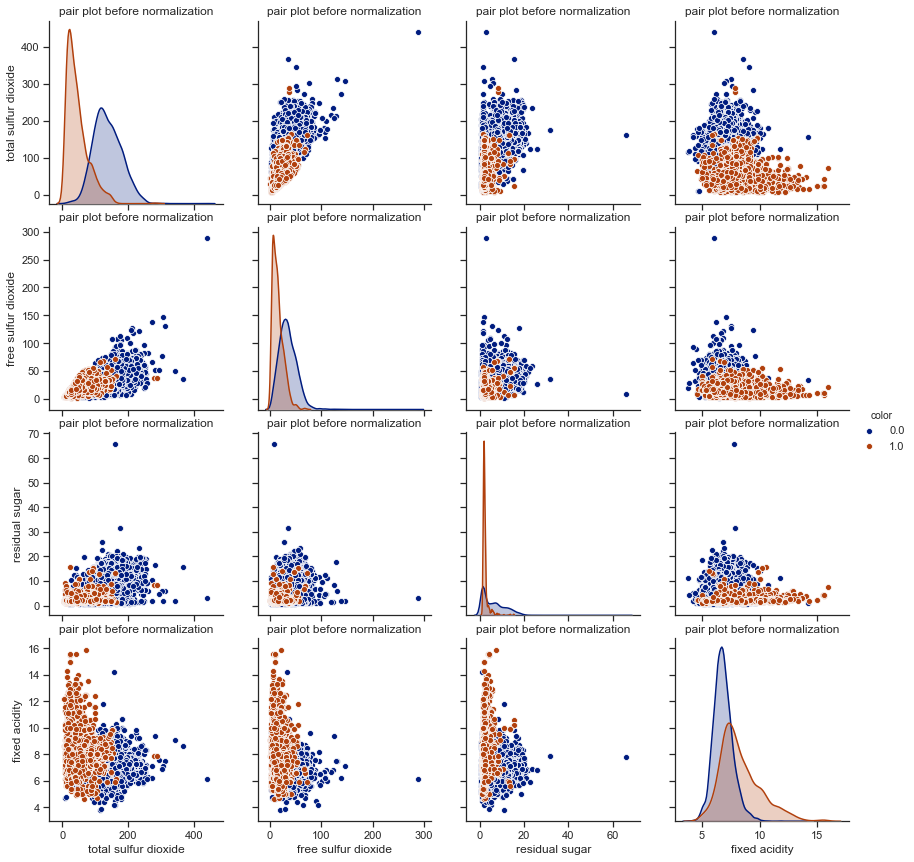

In [97]:
#pair plots before normalization

sns.set_palette("dark")

#print(wine_dc_one[DC].head())
sns_plot=sns.pairplot(wine[DC],hue='color',vars=['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity'],height=3)
#sns_plot.savefig("output.png")

#plt.title("pair plots before normalization")
sns_plot.set(title ="pair plot before normalization")


###### function for caluclating accuracies for different schemes and labels -> to minismize code repetition

In [98]:
#function for caluclating accuracy for different schemes
def cal_accuracy(X_train,y_train,X_test,y_test):
    n_neighborslist = list(range(1,50))
    col_names_new=['uniform','distance p = 1','distance p = 2']
    accarray = np.zeros((len(n_neighborslist),3))
    col_names = ['uniform','distance']
    #add multiple plots to same chart, one for each weighting approach
    acc =pd.DataFrame(accarray, columns=col_names_new)
    acc_subfeatures =pd.DataFrame(accarray, columns=col_names_new)
    for k in n_neighborslist:
        for c in col_names:
            if c == 'distance':
                for dp in [1,2]:                     
                    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=c,p=dp)
                    neigh.fit(X_train, y_train)
                    y_pred = neigh.predict(X_test)
                    accscore = accuracy_score(y_test, y_pred)
                    acc.at[k,c+' p = '+str(dp)] = accscore
            else:
                neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=c)
                neigh.fit(X_train, y_train)
                y_pred = neigh.predict(X_test)
                accscore = accuracy_score(y_test, y_pred)
                acc.at[k,c] = accscore
    return acc

###### part of code for calucalting and plotting graps for all features and sub- set of selected features for different schemes 

Text(0, 0.5, 'Accuracy')

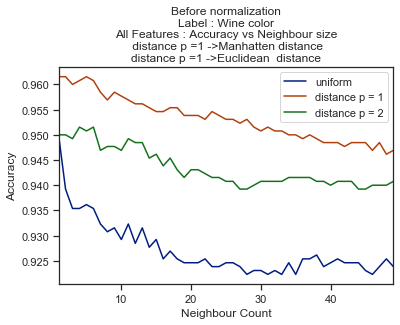

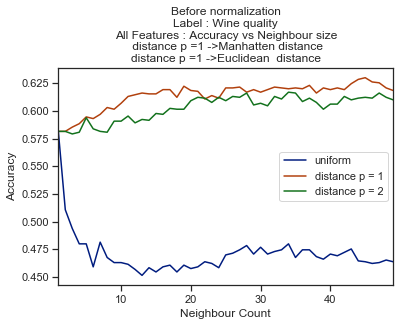

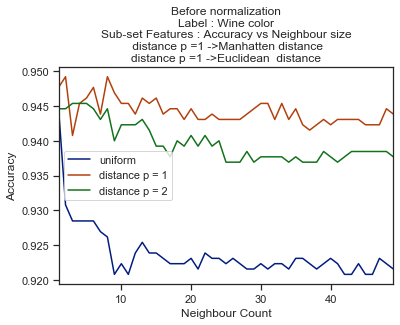

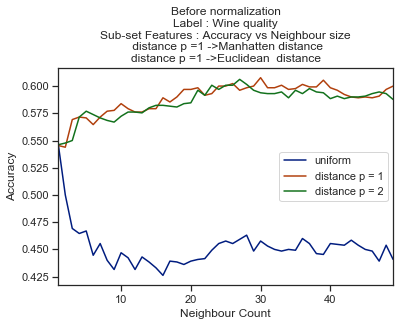

In [99]:
################################### ALL FEATURES ###################################################################
################################### LABEL : WINE COLOR #############################################################
X = wine[D].values
y = np.ravel(wine[[C]])

# deviding data set in train and test sets
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)
# all features label : wine color
acc = cal_accuracy(X_train,y_train,X_test,y_test)
#plotting line graph
acc[1:].plot.line()
plt.title("Before normalization\nLabel : Wine color\nAll Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
################################### LABEL : WINE QUALITY #############################################################
X_quality = wine[D].values
y_quality = np.ravel(wine[[L]])

# deviding data set in train and test sets
ran = 42
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, y_quality, test_size=0.2, random_state = ran)
# all features label : wine color
acc_quality = cal_accuracy(X_train_quality,y_train_quality,X_test_quality,y_test_quality)
#plotting line graph
acc_quality[1:].plot.line()
plt.title("Before normalization\nLabel : Wine quality\nAll Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
#################################### SUB SET OF FEATURES ##################################################################
################################### LABEL : WINE COLOR #############################################################
X_sub = wine[['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity']].values
y_sub = np.ravel(wine[[C]])
# deviding data set in train and test sets for the selected sub set of features
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state = ran) 

# subset features label : wine color
acc_subfeatures = cal_accuracy(X_train_sub,y_train_sub,X_test_sub,y_test_sub)
acc_subfeatures[1:].plot.line()
plt.title("Before normalization\nLabel : Wine color\nSub-set Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
################################### LABEL : WINE COLOR #############################################################
X_sub_quality = wine[['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity']].values
y_sub_quality = np.ravel(wine[[L]])
# deviding data set in train and test sets for the selected sub set of features
X_train_sub_quality, X_test_sub_quality, y_train_sub_quality, y_test_sub_quality = train_test_split(X_sub_quality, y_sub_quality, test_size=0.2, random_state = ran) 

# subset features label : wine color
acc_subfeatures_quality = cal_accuracy(X_train_sub_quality,y_train_sub_quality,X_test_sub_quality,y_test_sub_quality)
acc_subfeatures_quality[1:].plot.line()
plt.title("Before normalization\nLabel : Wine quality\nSub-set Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

###### Using PCA to fit data and use KNN for top 5 principle components and  ploting graph for accuracy vs neighbor size

uniform  distance p = 1  distance p = 2
0  0.000000        0.000000        0.000000
1  0.945385        0.955385        0.945385
2  0.936154        0.955385        0.945385
3  0.934615        0.956923        0.948462
4  0.935385        0.955385        0.951538

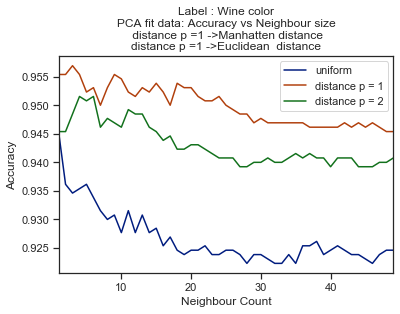

In [100]:
X = wine[D].values
y = np.ravel(wine[[C]])
#print(type(X_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

#fitting PCA model only for train set
pca = PCA(n_components=5)
pca.fit(X_train)

#transforming both train and test data using fitted model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#print(type(X_train_pca))

#calling function to caluclate accuracies
acc_pca = cal_accuracy(X_train_pca,y_train,X_test_pca,y_test)
acc_pca[1:].plot.line()
plt.title("Label : Wine color\nPCA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
acc_pca.describe()
acc_pca.head()

##### using Linear Discriminant Analysis to fit the data and then ploting graph for accuracy vs neighbor size

Text(0, 0.5, 'Accuracy')

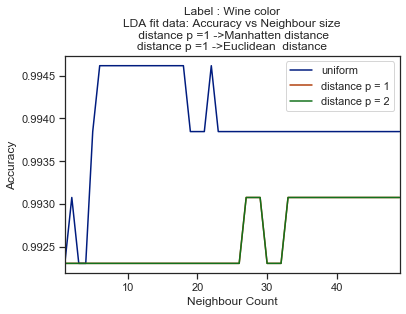

In [101]:
X = wine[D].values
y = np.ravel(wine[[C]])
#print(type(X_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

#fitting LinearDiscriminantAnalysis model only for train set
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train,y_train)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
#print(type(X_train_pca))
# print(X_train_lda.shape)

#calling function to caluclate accuracies
acc_lda = cal_accuracy(X_train_lda,y_train,X_test_lda,y_test)
# print(type(acc_lda))
acc_lda[1:].plot.line()
plt.title("Label : Wine color\nLDA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
# acc_lda.describe()
# acc_lda.head()

## After Z-Score Normalization

###### Z Score Normalization using StandarScaler model from sklearn 

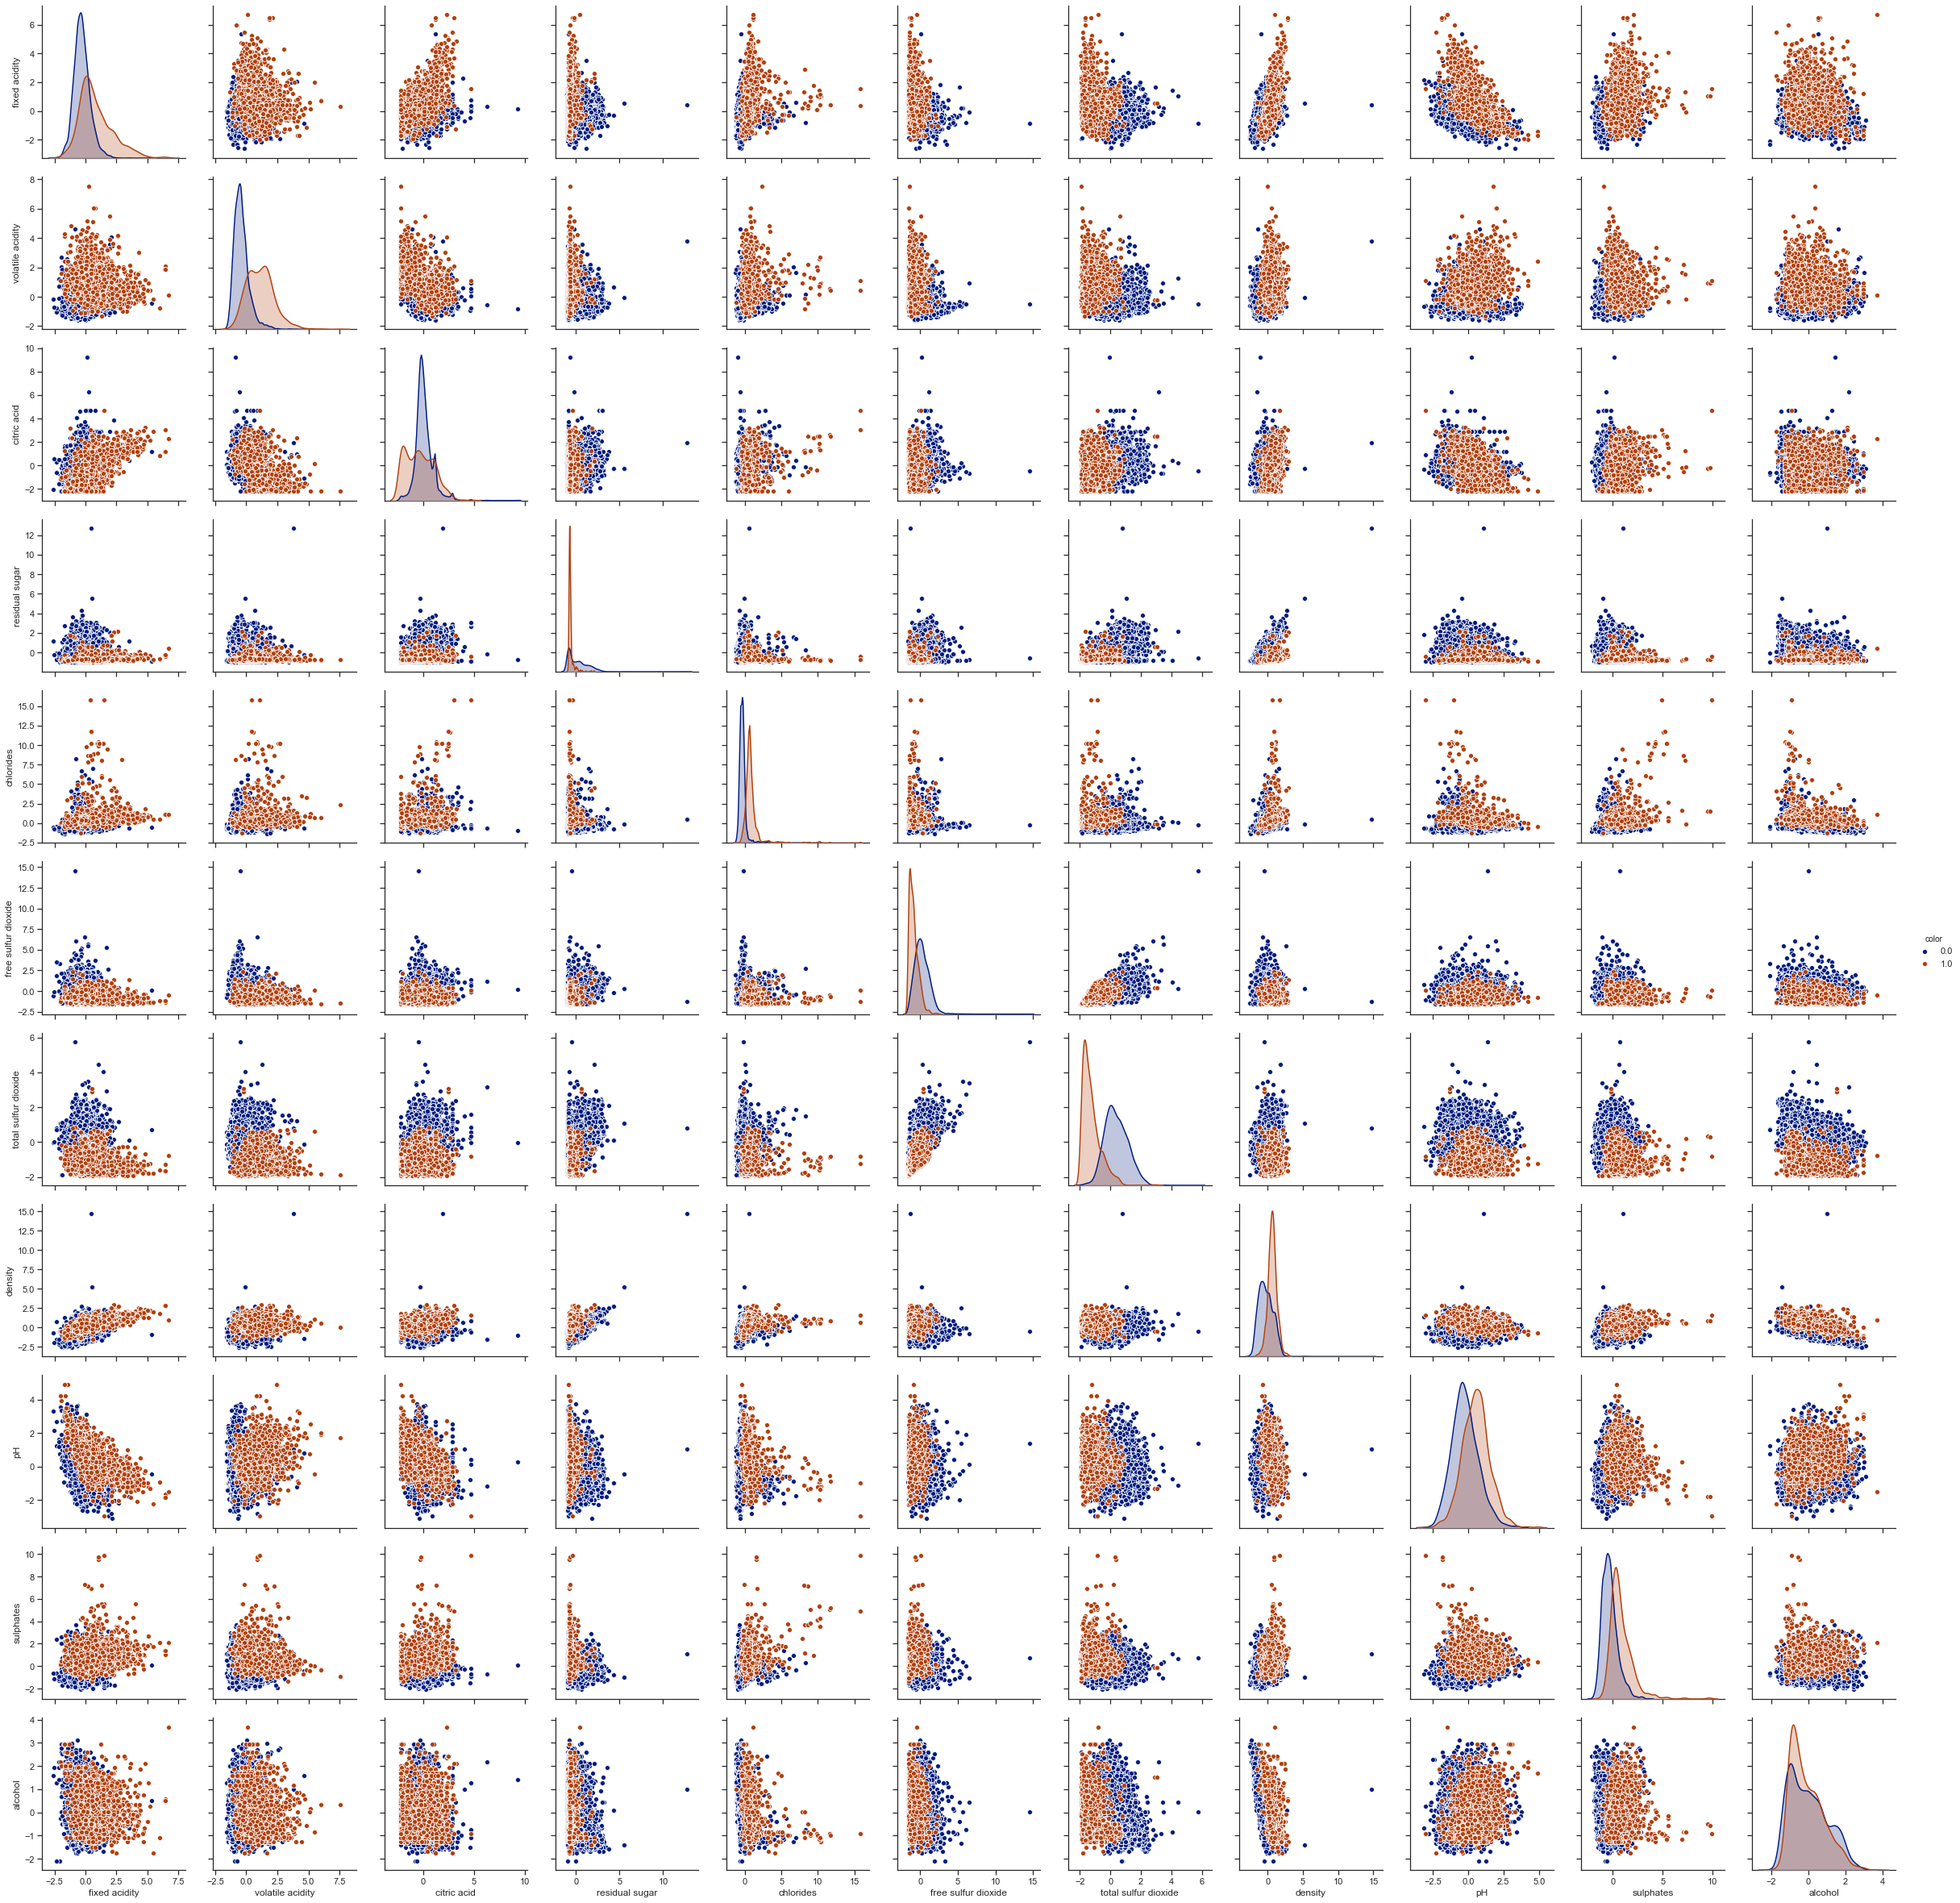

In [102]:
# temporary dataset for normalization
wine_dc_norm = pd.DataFrame(wine[DC])
wine_dc_norm['color']=wine_dc_norm['color'].astype(str)
features = wine_dc_norm[D]
scaler = StandardScaler().fit(features.values)
#print(scaler.mean_)
features = scaler.transform(features.values)
wine_dc_norm[D] = features
#print(wine_dc[DC].head())
sns.set_palette("dark")
sns_plot_one = sns.pairplot(wine_dc_norm,hue='color',vars= ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],height=3)
sns_plot_one.savefig("output_one.png")

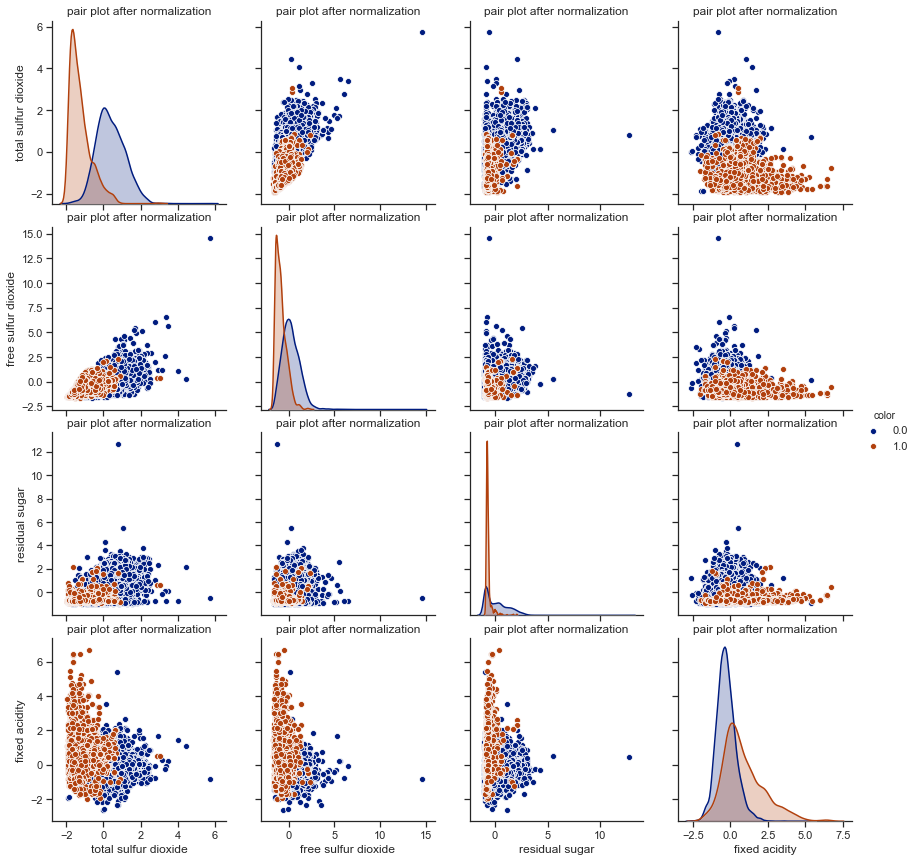

In [103]:
sns.set_palette("dark")

#print(wine_dc_one[DC].head())
sns_plot=sns.pairplot(wine_dc_norm,hue='color',vars=['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity'],height=3)
#sns_plot.savefig("output.png")

#plt.title("pair plots before normalization")
sns_plot.set(title ="pair plot after normalization")


###### part of code for calucalting and plotting graps for all features and sub- set of selected features for different schemes 

Text(0, 0.5, 'Accuracy')

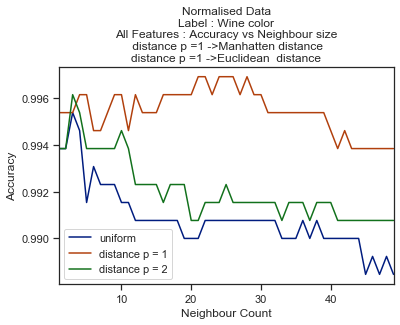

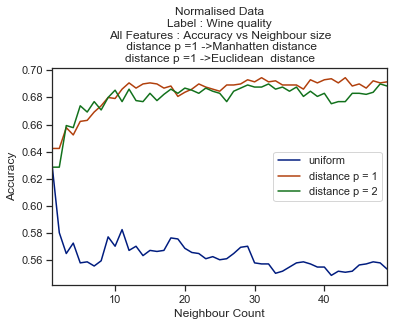

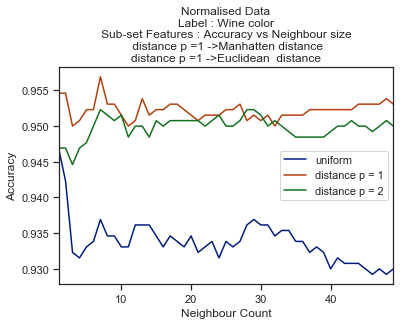

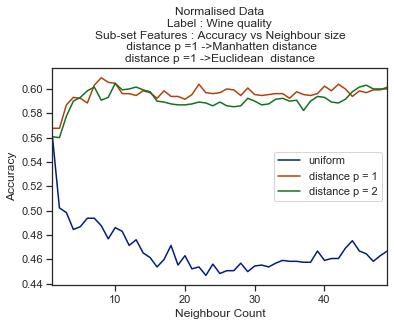

In [104]:
################################### ALL FEATURES ###################################################################
################################### LABEL : WINE COLOR #############################################################
X = wine[D].values
y = np.ravel(wine[[C]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

acc_norm = cal_accuracy(X_train_norm,y_train,X_test_norm,y_test)
#plotting line graph
acc_norm[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nAll Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
################################### LABEL : WINE QUALITY #############################################################
X_quality = wine[D].values
y_quality = np.ravel(wine[[L]])

X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X_quality, y_quality, test_size=0.2, random_state = ran)

scaler = StandardScaler().fit(X_train_quality)
X_train_norm = scaler.transform(X_train_quality)
X_test_norm = scaler.transform( X_test_quality)

# all features label : wine color
acc_norm_quality = cal_accuracy(X_train_norm,y_train_quality,X_test_norm,y_test_quality)
#plotting line graph
acc_norm_quality[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine quality\nAll Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")
#################################### SUB SET OF FEATURES ##################################################################
################################### LABEL : WINE COLOR #############################################################
X_sub = wine[['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity']].values
y_sub = np.ravel(wine[[C]])
# deviding data set in train and test sets for the selected sub set of features
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state = ran) 

scaler = StandardScaler().fit(X_train_sub)
X_train_norm = scaler.transform(X_train_sub)
X_test_norm = scaler.transform(X_test_sub)

# subset features label : wine color
acc_norm_subfeatures = cal_accuracy(X_train_norm,y_train_sub,X_test_norm,y_test_sub)
acc_norm_subfeatures[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nSub-set Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

################################### LABEL : WINE COLOR #############################################################
X_sub_quality = wine[['total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity']].values
y_sub_quality = np.ravel(wine[[L]])
# deviding data set in train and test sets for the selected sub set of features
X_train_sub_quality, X_test_sub_quality, y_train_sub_quality, y_test_sub_quality = train_test_split(X_sub_quality, y_sub_quality, test_size=0.2, random_state = ran) 

scaler = StandardScaler().fit(X_train_sub_quality)
X_train_norm = scaler.transform(X_train_sub_quality)
X_test_norm = scaler.transform( X_test_sub_quality)

# subset features label : wine color
acc_subfeatures_quality = cal_accuracy(X_train_norm,y_train_sub_quality,X_test_norm,y_test_sub_quality)
acc_subfeatures_quality[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine quality\nSub-set Features : Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

###### Using PCA to fit data and use KNN for top 5 principle components and  ploting graph for accuracy vs neighbor size

Text(0, 0.5, 'Accuracy')

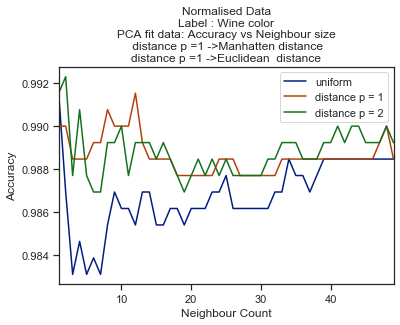

In [105]:
X = wine[D].values
y = np.ravel(wine[[C]])
#print(type(X_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
#fitting PCA model only for train set
pca = PCA(n_components=5)
pca.fit(X_train_norm)

#transforming both train and test data using fitted model
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
#print(type(X_train_pca))

#calling function to caluclate accuracies
acc_pca = cal_accuracy(X_train_pca,y_train,X_test_pca,y_test)
acc_pca[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nPCA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
# acc_pca.describe()
# acc_pca.head()
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

##### using Linear Discriminant Analysis to fit the data and then ploting graph for accuracy vs neighbor size

Text(0, 0.5, 'Accuracy')

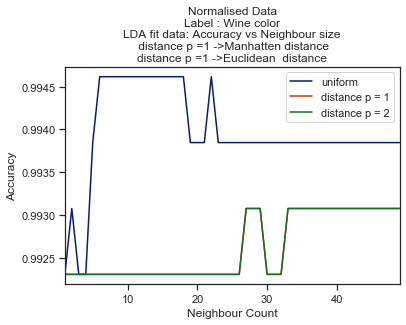

In [106]:
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#fitting LinearDiscriminantAnalysis model only for train set
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train_norm,y_train)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train_norm)
X_test_lda = lda.transform(X_test_norm)

#calling function to caluclate accuracies
acc_lda = cal_accuracy(X_train_lda,y_train,X_test_lda,y_test)
# print(type(acc_lda))
acc_lda[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nLDA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
# acc_lda.describe()
# acc_lda.head()
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

###### PCA and LDA for label 'quality'

Text(0, 0.5, 'Accuracy')

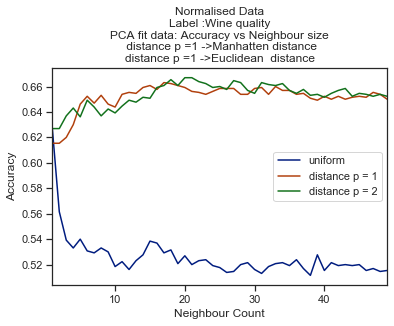

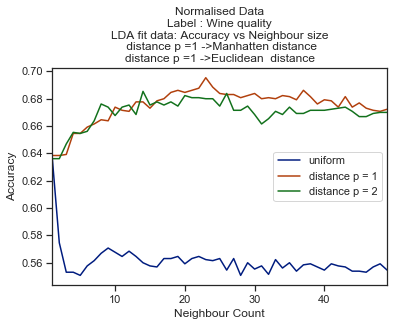

In [107]:
X = wine[D].values
y = np.ravel(wine[[L]])
#print(type(X_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#fitting PCA model only for train set
pca = PCA(n_components=5)
pca.fit(X_train_norm)

#transforming both train and test data using fitted model
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
#print(type(X_train_pca))

#calling function to caluclate accuracies
acc_pca = cal_accuracy(X_train_pca,y_train,X_test_pca,y_test)
acc_pca[1:].plot.line()
plt.title("Normalised Data\nLabel :Wine quality\nPCA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
# acc_pca.describe()
# acc_pca.head()
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train_norm,y_train)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train_norm)
X_test_lda = lda.transform(X_test_norm)

#calling function to caluclate accuracies
acc_lda = cal_accuracy(X_train_lda,y_train,X_test_lda,y_test)
# print(type(acc_lda))
acc_lda[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine quality\nLDA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
# acc_lda.describe()
# acc_lda.head()
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

#### Trying MINMAX scaler to check if it can out performe (Z-norm,Manhatten) Scheme

Text(0, 0.5, 'Accuracy')

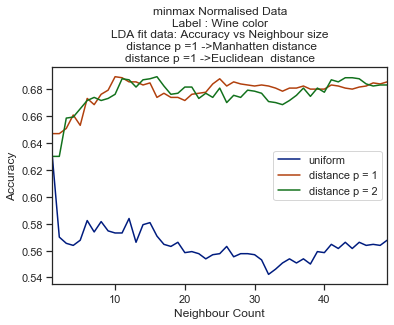

In [108]:
scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

acc_minmax = cal_accuracy(X_train_minmax,y_train,X_test_minmax,y_test)
acc_minmax[1:].plot.line()
plt.title("minmax Normalised Data\nLabel : Wine color\nLDA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance") 
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

### Trials for selecting best features which can outperform dataset with all features

#####  using Feature Importance from ExtraTreeClssifiers module
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

[0.08229933 0.1448678  0.0387661  0.0714032  0.12928253 0.05090251
 0.27131068 0.10104689 0.04263941 0.0520074  0.01547414]


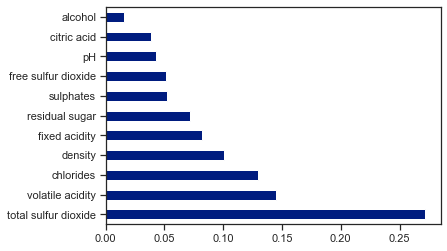

In [109]:
#using teh normalised data before feature selection as it gives better results
data = wine_dc_norm
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]    #target color column
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

Text(0, 0.5, 'Accuracy')

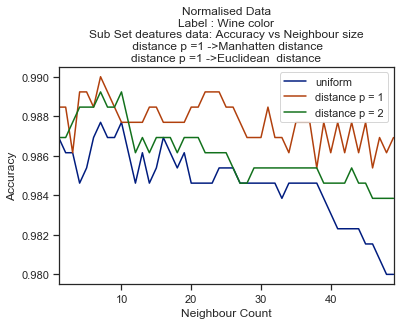

In [110]:
# from the above graph we can observe that below features are more valuble
best_features = ['total sulfur dioxide','volatile acidity','chlorides','density']
X = wine[best_features].values
y = np.ravel(wine[[C]])
#print(type(X_train))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

acc_chi = cal_accuracy(X_train_norm,y_train,X_test_norm,y_test)
acc_chi[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nSub Set deatures data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")


###### The above method did not out perform Z-norm and manhatten scheme for a range of 15 values

##### Trying LDA for the Data of SUB SET of Features 

Text(0, 0.5, 'Accuracy')

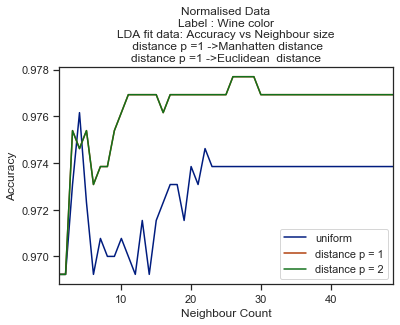

In [111]:
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train_norm,y_train)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train_norm)
X_test_lda = lda.transform(X_test_norm)

#calling function to caluclate accuracies
acc_lda = cal_accuracy(X_train_lda,y_train,X_test_lda,y_test)
# print(type(acc_lda))
acc_lda[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nLDA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
# acc_lda.describe()
# acc_lda.head()
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

###### Even This scheme did not out perform Z-norm and Manhatten Scheme with all features dataset

##### Trying The following order : normalization ,PCA and then LDA for the dataset with full features

Text(0, 0.5, 'Accuracy')

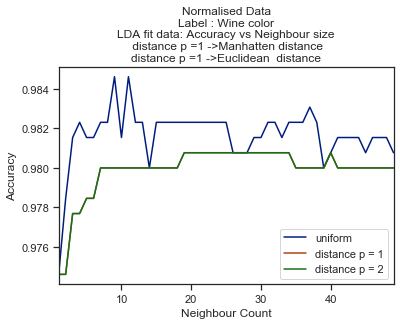

In [112]:
X = wine[D].values
y = np.ravel(wine[[C]])

# deviding data set in train and test sets
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

#normalization
scaler = StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

#applying PCA model
pca = PCA(n_components=5)
pca.fit(X_train_norm)

#transforming both train and test data using fitted model
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

#then applying LDA
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train_pca,y_train)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

#calling function to caluclate accuracies
acc_lda = cal_accuracy(X_train_lda,y_train,X_test_lda,y_test)
acc_lda[1:].plot.line()
plt.title("Normalised Data\nLabel : Wine color\nLDA fit data: Accuracy vs Neighbour size\n distance p =1 ->Manhatten distance\ndistance p =1 ->Euclidean  distance")
plt.xlabel("Neighbour Count")
plt.ylabel("Accuracy")

###### Even This scheme did not out perform Z-norm and Manhatten Scheme with all features dataset

### Projecting first two components of PCA

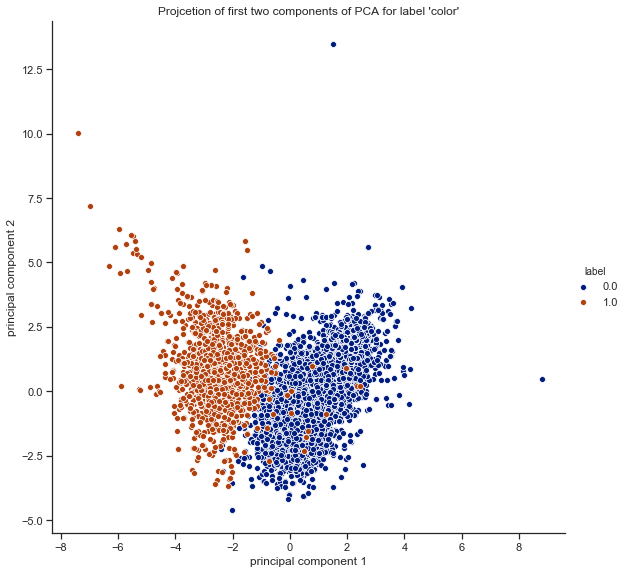

In [113]:
df = wine[D].values
c = np.ravel(wine[[C]])
l = np.ravel(wine[[L]])

scaler = StandardScaler().fit(df)
df_norm = scaler.transform(df)
# X_test_norm = scaler.transform(X_test)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['label'] = wine[C].values
# print(principalDf.shape)
sns.set_palette("dark")
sns.pairplot(principalDf,hue='label',x_vars=['principal component 1'],y_vars=['principal component 2'],height=8).set(title ="Projcetion of first two components of PCA for label 'color'")

<class 'pandas.core.frame.DataFrame'>


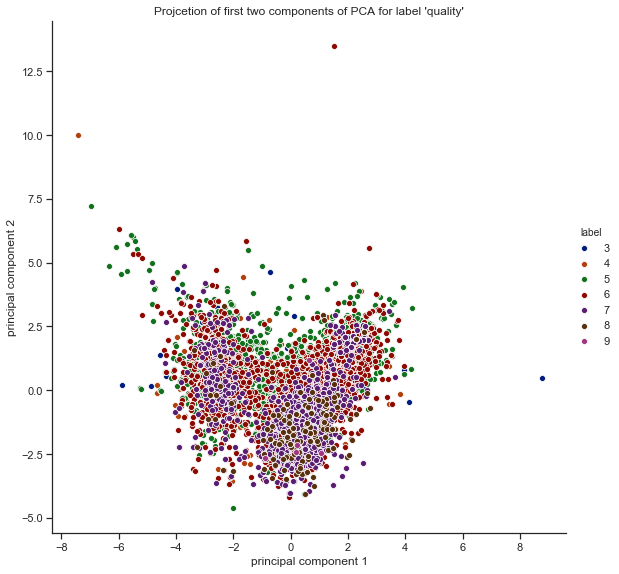

In [114]:
principalDf['label'] = wine[L].values
print(type(principalDf))
sns.set_palette("dark")
sns.pairplot(principalDf,hue='label',x_vars=['principal component 1'],y_vars=['principal component 2'],height=8).set(title ="Projcetion of first two components of PCA for label 'quality'")

#### Projecting first two components of LDA

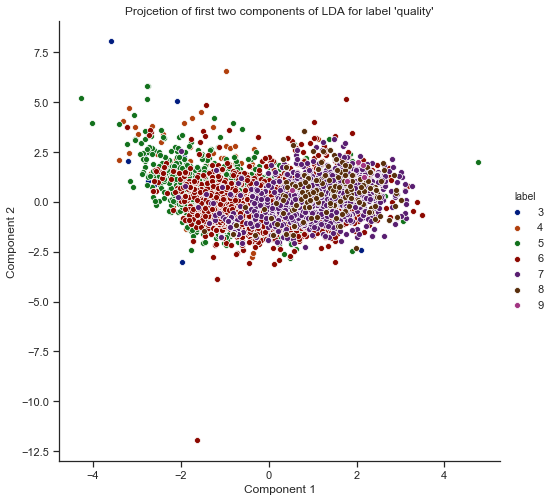

In [115]:
X = wine[D].values
y = np.ravel(wine[[L]])

# deviding data set in train and test sets
# ran = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

scaler = StandardScaler().fit(X)
X_train_norm = scaler.transform(X)


#fitting LinearDiscriminantAnalysis model only for train set
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train_norm,y)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train_norm)
# X_test_lda = lda.transform(X_test_norm)
# print(X_train_lda.shape)
# print(type(X_train_lda))
X_train_lda = pd.DataFrame(data = X_train_lda, columns = ['Component 1', 'Component 2'])
# print(type(X_train_lda))
# print(X_train_lda.shape)
# print(wine[L].shape)
X_train_lda['label']=wine[L].values
sns.set_palette("dark")
sns.pairplot(X_train_lda,hue='label',x_vars=['Component 1'],y_vars=['Component 2'],height=7).set(title ="Projcetion of first two components of LDA for label 'quality'")
# sns_p.set(title ="Projcetion of first two components of LDA")

#  Analysis and Discussion

### k Plots:

##### The below plots are for different cases indicated by the plot titles
The selected sub-set of features are 'total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity'

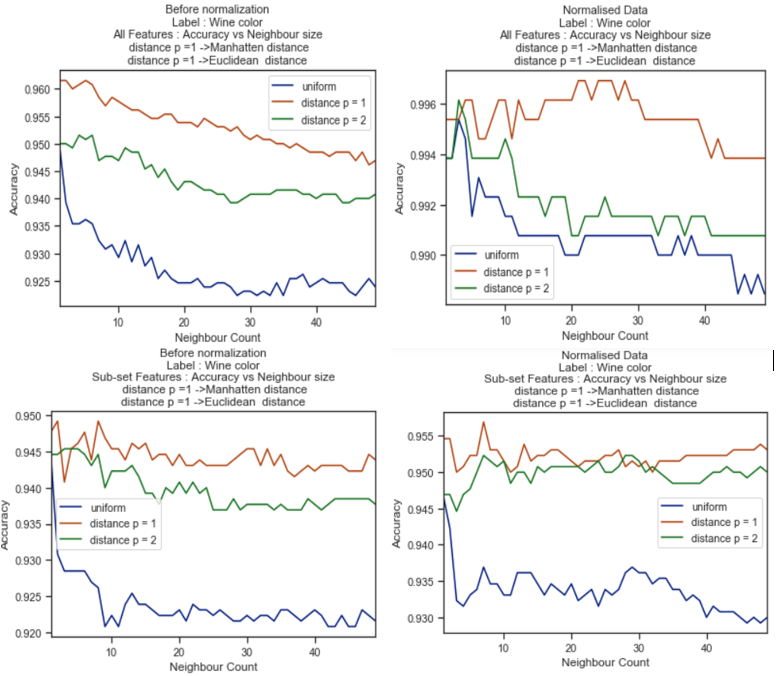
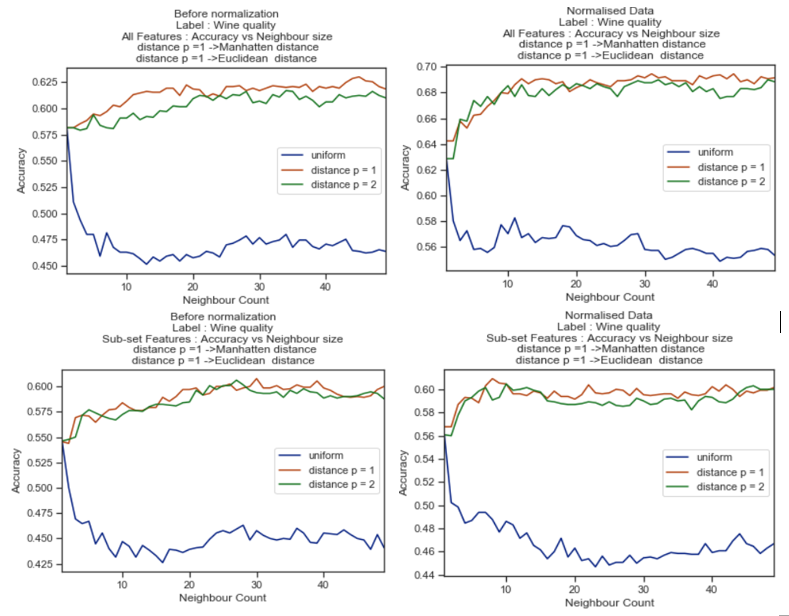

###### From the above graphs we can observe that :
 - The acuuracy of the perdiction is always greater when the data is normalized than that of teh accuracies obtained without normalization
 
 - The highest accuracy obtained is 99.6923 % when the data is normalized using Z-norm and when the point weighting schem is using "distance based weight with manhattan distance" 
 
 - The accuaracy rates when the lable or target is 'wine color' is very high compared to label 'wine quality' as the umber of classes in color are only two where are in quality has a huge number.
 
 - For Z-norm and Manhatten scheme ,KNN ha better performance when the neighbour Count is in the range of (15-30).
 
 - Distance based weighing schemes always out performed the normal weighing schemes.
 
 - Manhatten Scheme seems to perform better than Euclidean scheme most of teh time.


### Features and Selected Features:

##### Analysis using univariate selection

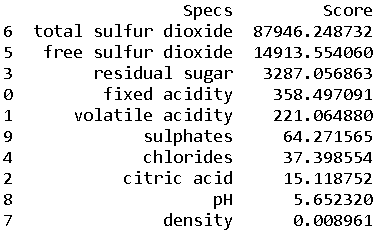

 - From the above scores we can observe the features which has strong relationship with the variable.This has been performed on non -normalized data.
 - We can observe that 'total sulfur dioxide','free sulfur dioxide','residual sugar' has scores far greater than the scores obtained by the remaining features.
 - From the graphs of KNN accuracies ,it can be observed that even when the considered features are 'total sulfur dioxide','free sulfur dioxide','residual sugar' and 'fixed acidity' the accuracy of the model did not drop much.In case when you consider reducing teh computational costs of the algorithm ,these sub- set of features can be selected to provide good accuracy and good computational efficiencies too.
###### - For this Dataset ,selecting Sub-set of features did not improve the accuracy of the model when compared to considering all features.

##### Feature Importance Selection Method
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable

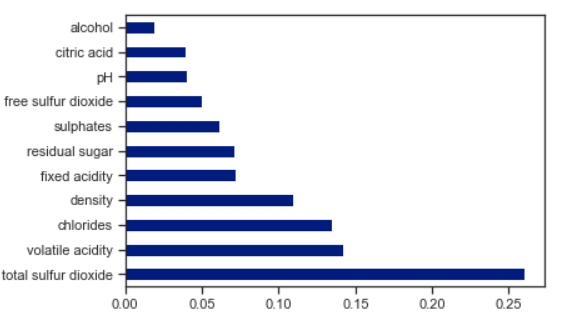

 - The above selection has been made for the normalized data
 - From the above graph,we can observe that  'total sulfur dioxide','volatile acidity','chlorides' and 'density' has more relavence to the output that the other features.

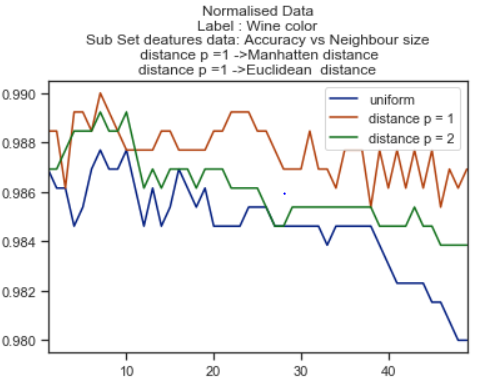
Even with the selection of only 4 feature , the accuracy of the model did not drop much.And this normalised data feature selection performed better than the non-normalized data deature selection

###### Selection of sub set of features did not outperform PCA or LDA.But the accuray  drop is less than 1% when compared to both the cases

#### Pair Plots comparison:

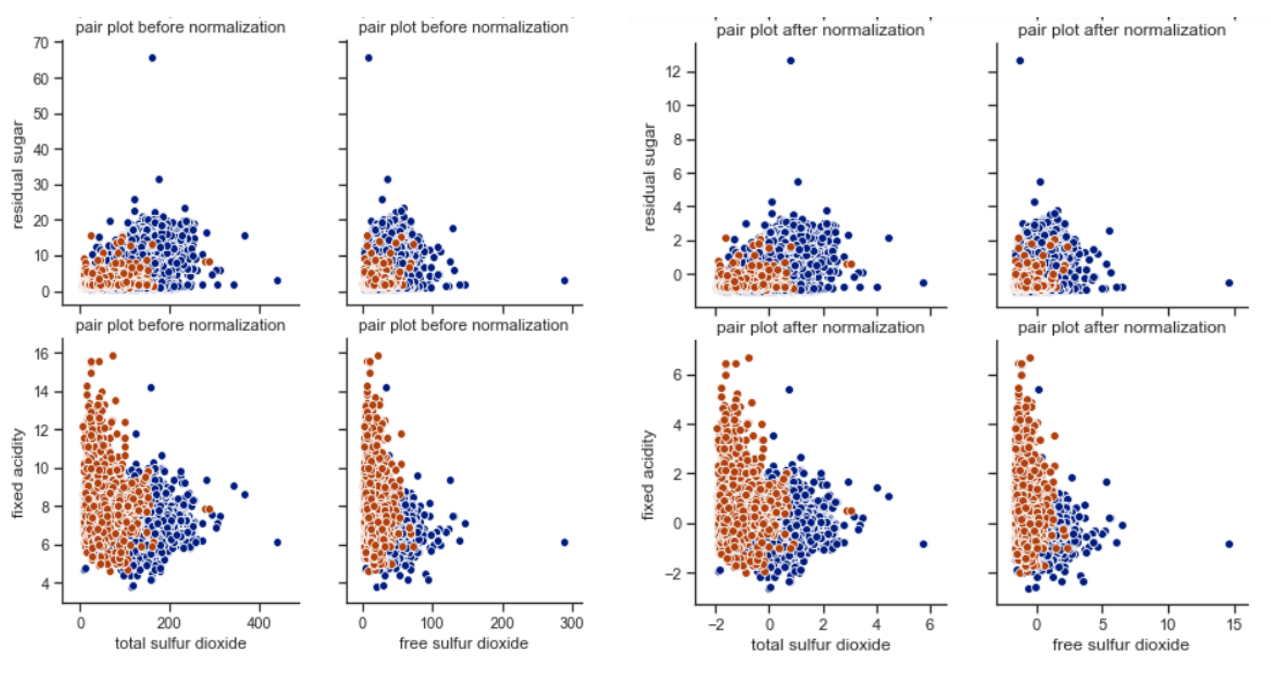

Considering only 4 plots as it is diffcult to compare 11 * 11 plots.
From the above graphs before and after normalization ,we can observe :

 - We can notice Z-score normalization converts all features to a common scale with an average of zero and standard deviation of one.
 - The average of zero means that it avoids introducing aggregation distortions stemming from differences in means of the features means.
 - Z-score normalization is a strategy of normalizing data that avoids this outlier issue.

### PCA vs. LDA:

###### Did either of these methods help in this situation?Which worked better for the task?
 - Neither PCA nor LDA has out performed the Z-norm - Manhatten scheme in terms of accuracy.But the accuracy drop is very less i.e. around 0.5%.
 - For this data set they did not provide much improvement in the model.

###### Did normalization impact the performance of either of them?
 - Normalization has impacted the performance of PCA but not LDA.
 - The reults obtained for LDA before and afer normalization are same.
 
 Reasons learned from :
https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step

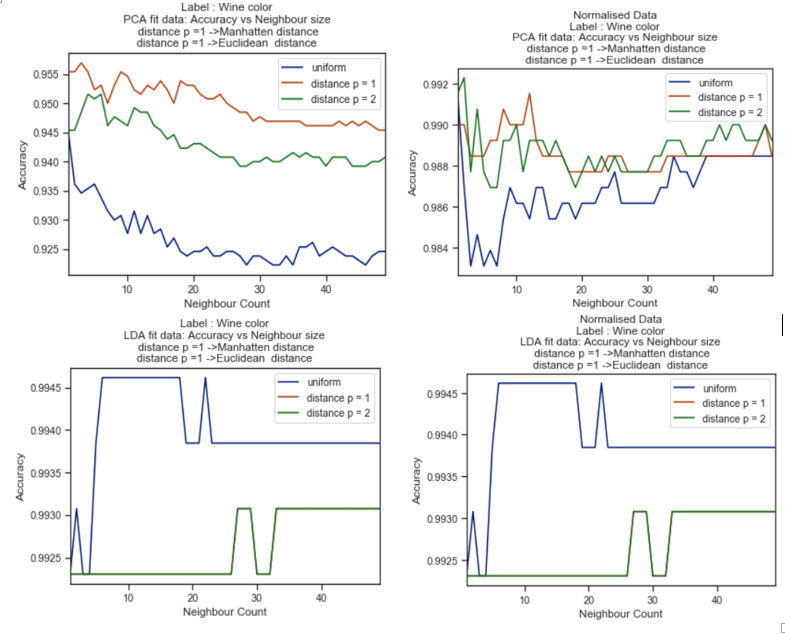

###### Plot project he data on the first two components for PCA and LDA and colour the points by the two labels ('quality','color') so four plots in total. How does this compare or inform your understanding of the  data from the pairplots or other results?

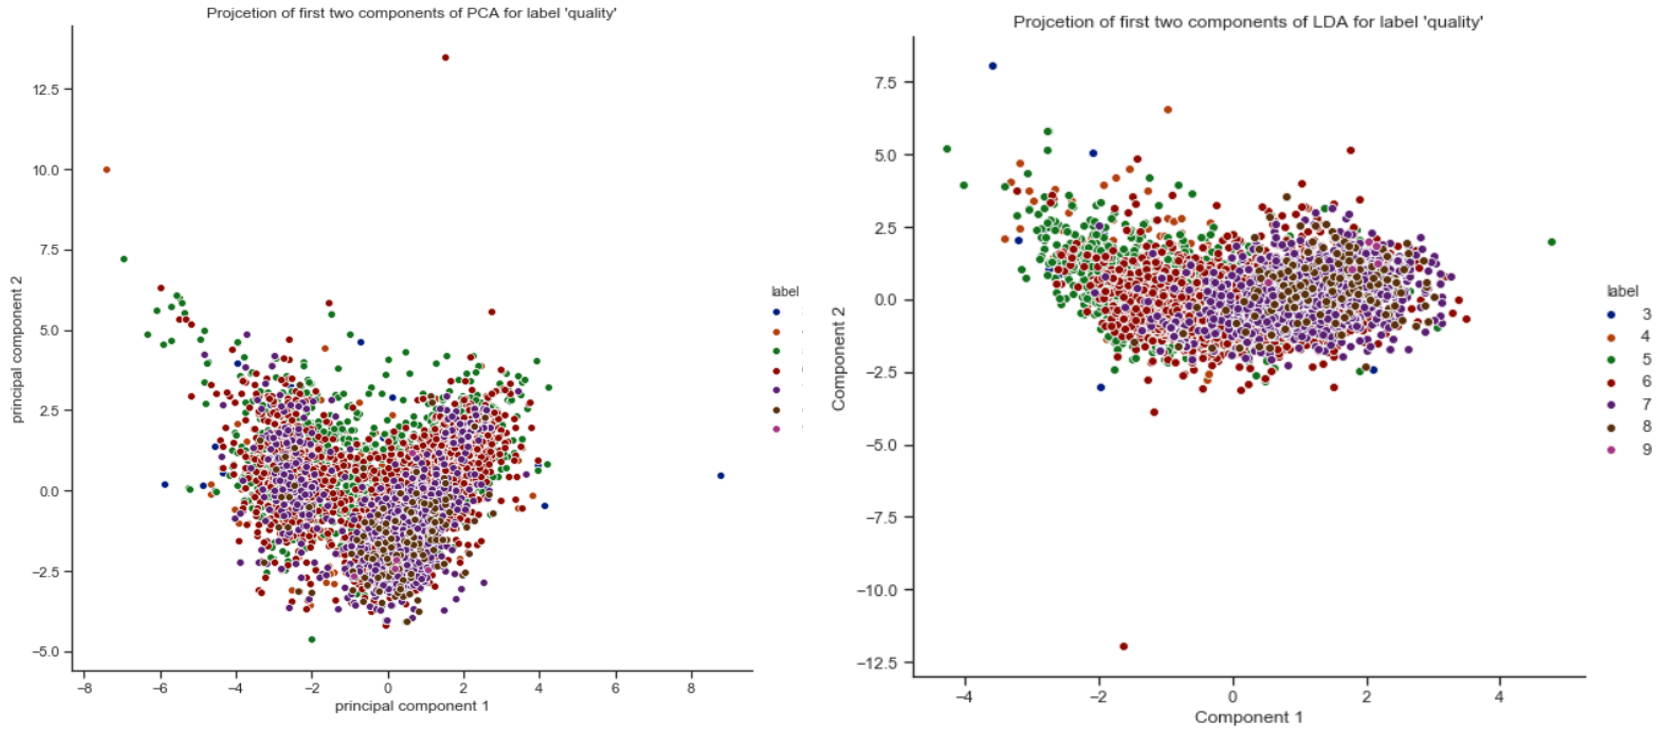
From the above graphs of projects of first two components of PCA and LDA for labels 'quality' we can observe that the LDA seems to cluster the data little bit better than that od PCA.More clear clustering can be seen in LDA ,whereas PCA doesnt tend to do that better.

As per the perious analysis, for normalised data the accuracy given by LDA for label 'quality' is better than that of PCA as shown in below comparision.As LDA clusters are more clearer than PCA ,this accuracy can be thus explained.

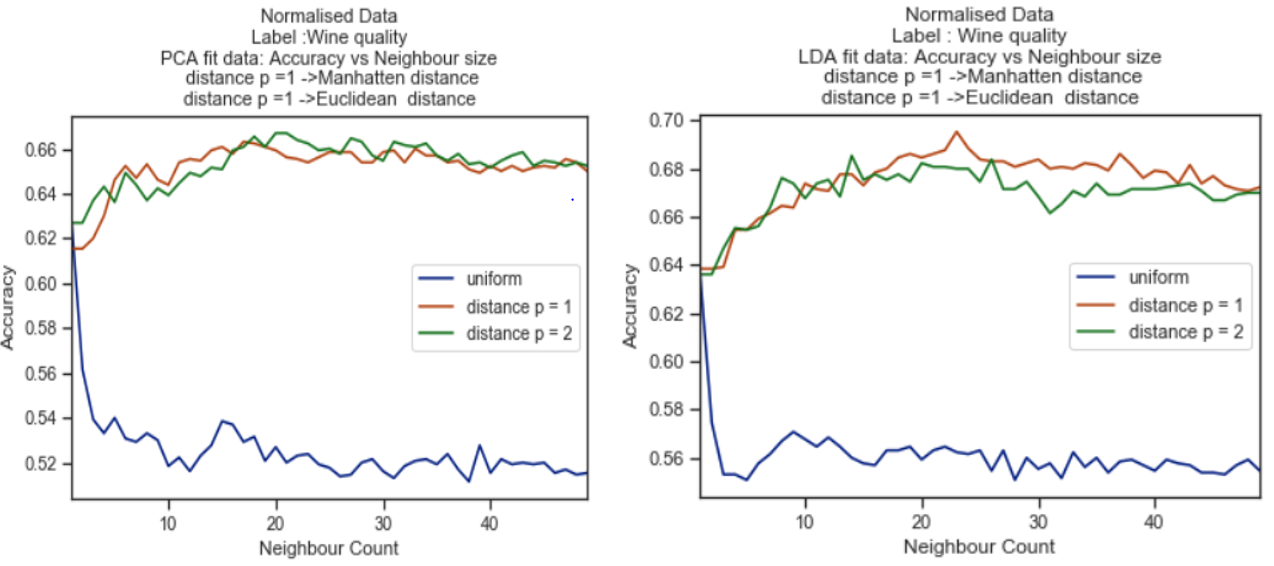

Refernces :

 - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
 - https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
 - https://kite.com/python/examples/370/numpy-compute-the-eigenvalues-of-a-matrix
 - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html